In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
%matplotlib inline

(500, 375, 3)


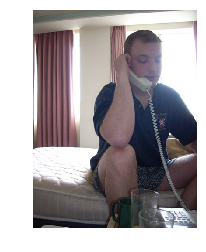

In [3]:
example = mpimg.imread(os.path.join('JPEGImages', '2011_003353.jpg'))
print(example.shape)
plt.imshow(example)
plt.axis('off')
plt.show()

In [4]:
import xml.etree.ElementTree as ET

In [5]:
tree = ET.parse(os.path.join('Annotations/2011_003353.xml'))
object_names = [object_name.text for object_name in tree.findall('object/name')]
bnd_box_roots = tree.findall('object/bndbox')
bnd_boxs = [(bnd_box_root.findtext('xmin'), bnd_box_root.findtext('ymin'),
            bnd_box_root.findtext('xmax'), bnd_box_root.findtext('ymax'),) 
            for bnd_box_root in list(bnd_box_roots)]
print(object_names)
print(bnd_boxs)

['person']
[('130', '45', '375', '470')]


(500, 375, 3)
(425, 245, 3)
(299, 299, 3)


/anaconda3/envs/ai_course/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


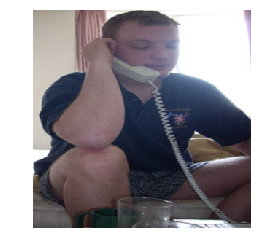

In [8]:
from scipy.misc import imresize
from __future__ import division, print_function, unicode_literals

#print(type(example))
print(example.shape)
#region_proposal = example[101:352, 174:349]
region_proposal = example[int(bnd_boxs[0][1]) : int(bnd_boxs[0][3]), int(bnd_boxs[0][0]) : int(bnd_boxs[0][2])]
#print(type(region_proposal))
print(region_proposal.shape)
region_proposal = imresize(region_proposal, (299, 299))
region_proposal.astype(np.float32) / 255
print(region_proposal.shape)
plt.imshow(region_proposal)
plt.axis('off')
plt.show()